# Simulated Annealing

In [4]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## TSP Traveling Salesman Problem


[Testdaten für TSP](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/)

Die [optimale Lösung](https://www.researchgate.net/figure/The-optimal-solution-of-Berlin52_fig2_221901574) für berlin52 ist 7544.3659


In [36]:
berlin52 = [(565, 575), (25, 185), (345, 750), (945, 685), (845, 655), (880, 660), (25, 230), 
            (525, 1000), (580, 1175), (650, 1130), (1605, 620), (1220, 580), (1465, 200), (1530, 5),
            (845, 680), (725, 370), (145, 665), (415, 635), (510, 875), (560, 365), (300, 465), 
            (520, 585), (480, 415), (835, 625), (975, 580), (1215, 245), (1320, 315), (1250, 400),
            (660, 180), (410, 250), (420, 555), (575, 665), (1150, 1160), (700, 580), (685, 595),
            (685, 610), (770, 610), (795, 645), (720, 635), (760, 650), (475, 960), (95, 260),
            (875, 920), (700, 500), (555, 815), (830, 485), (1170, 65), (830, 610), (605, 625), 
            (595, 360), (1340, 725), (1740, 245)]

In [59]:
def show(tour):
    xs = [x[0] for x in tour]
    ys = [x[1] for x in tour]
    xs.append(xs[0])
    ys.append(ys[0])
    plt.figure(figsize=(8,5))
    plt.scatter(xs, ys,s=10)        # these are the cities (points)
    plt.plot(xs, ys, linewidth=0.2)  # the edges
    plt.show()
    
def randomTour(k, seed=42):
    '''
    k: Anzahl Städte
    '''
    random.seed(seed)
    xs = [random.randint(1,400) for _ in range(k)]
    ys = [random.randint(1,400) for _ in range(k)]
    xs.append(xs[0])
    ys.append(ys[0])
    return list(zip(xs,ys))

def distance(tour):
    '''
    returns: distance, wenn die cities in der Reihenfolge von tour besucht werden
        und zum Anfangspunkt zurückgekehrt wird.
    '''
    n = len(tour)
    result = 0
    for i in range(len(tour)):
        xd = tour[i][0] - tour[(i+1)%n][0]
        yd = tour[i][1] - tour[(i+1)%n][1]
        result += math.sqrt(xd*xd+yd*yd)
    return result

def neighbor(tour):
    '''
    return sTour nach einem zufälligen 2-opt swap
    '''
    # Sortierung wichtig, sonst wird tour länger!!!
    i,j = sorted(random.sample(range(len(tour)),2))   
    w1 = tour[:i] 
    w2 = [tour[i],tour[j]]
    w3 = tour[j-1:i:-1]  
    w4 = tour[j+1:] 
    return w1 + w2 + w3 + w4

def anneal(tour,alpha=0.996,H=125):
    dist = distance(tour)
    tour = tour.copy()
    T = 100
    T_min = 0.0005
    while T > T_min:
        for i in range(H):
            new_tour = neighbor(tour)
            new_dist = distance(new_tour)
            if (new_dist < dist):
                tour = new_tour 
                dist = new_dist
            else:
                loss = new_dist - dist
                if random.random() <=  math.exp(-loss/T):
                    tour = new_tour 
                    dist = new_dist
        T = T*alpha
    return tour 

### Zufällige Städte

Weglänge = 6756.784824478619


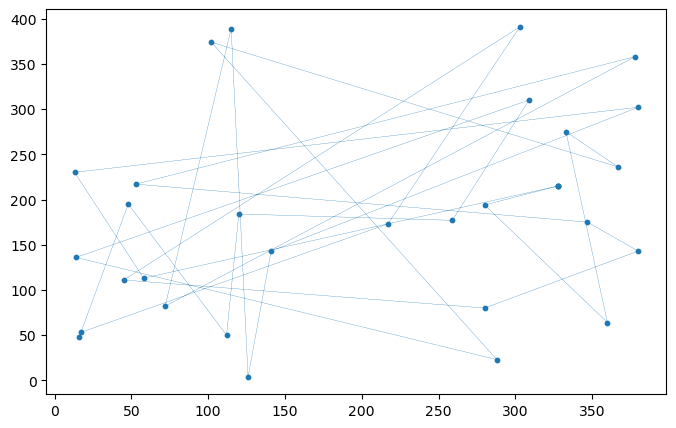

Weglänge = 1915.050536333779


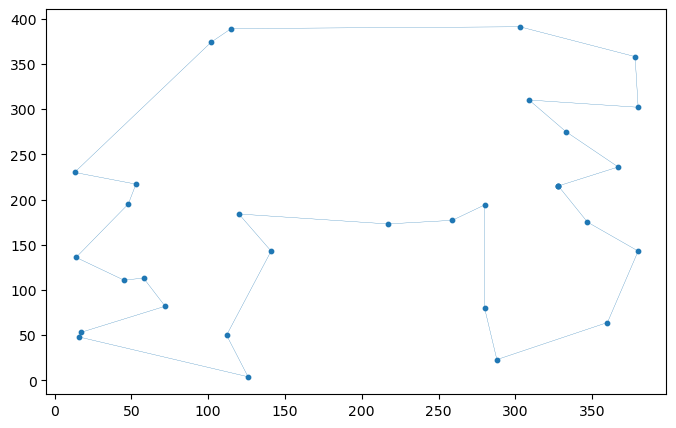

CPU times: total: 10.2 s
Wall time: 10.2 s


In [49]:
%%time
tour = randomTour(30)
print(f'Weglänge = {distance(tour)}')
show(tour)
tour = anneal(tour)
print(f'Weglänge = {distance(tour)}')
show(tour)

### Berlin52


Weglänge = 7544.36590190409


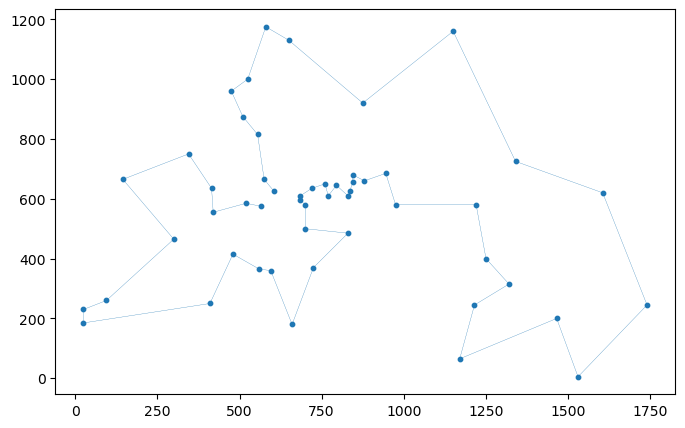

CPU times: total: 15.1 s
Wall time: 15.1 s


In [45]:
%%time
# random.seed(1) findet den optimalen Weg
random.seed(1)
tour = berlin52
tour = anneal(tour)
print()
print(f'Weglänge = {distance(tour)}')
show(tour)

### Codingame Examples

https://www.codingame.com/ide/puzzle/travelling-salesman

#### Beispiel 1

Weglänge = 2912.570700484742


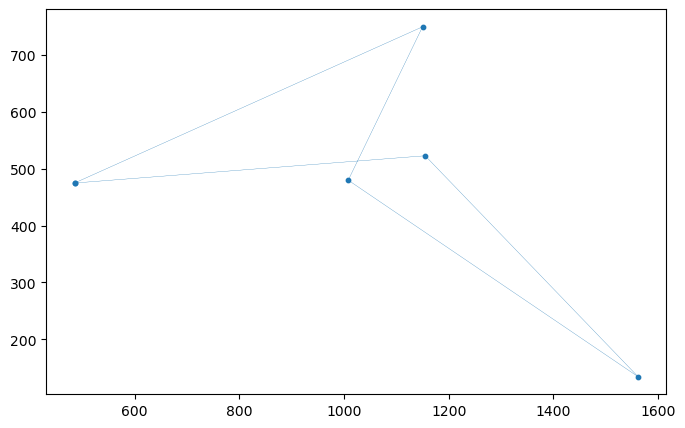

Weglänge = 2685.8685297875927


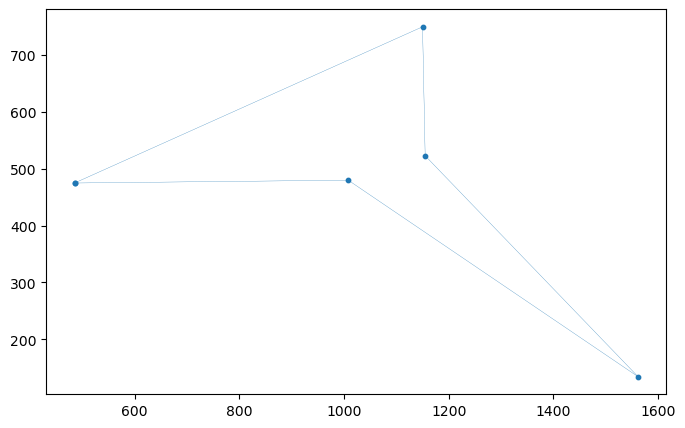

In [50]:
tour=[(485, 475), (1150, 750), (1008, 480), (1562, 134), (1155, 523)]
print(f'Weglänge = {distance(tour)}')
show(tour)
tour = anneal(tour)
print(f'Weglänge = {distance(tour)}')
show(tour)

#### Beispiel 5 (300 Städte)

In [64]:
%%time
tour=[(1585, 817), (1578, 521), (331, 606), (680, 581), (1199, 41), (319, 528), (1682, 957), (1508, 118), (1676, 950), (28, 569), (35, 253), (202, 825), (1144, 332), (1204, 470), (11, 471), (1784, 125), (1759, 930), (42, 643), (616, 753), (264, 20), (842, 852), (1705, 893), (1509, 872), (1105, 283), (106, 761), (542, 121), (1510, 501), (325, 939), (1340, 833), (47, 676), (12, 113), (1325, 805), (1549, 881), (995, 396), (1392, 290), (768, 533), (1572, 255), (537, 958), (795, 148), (4, 951), (1733, 249), (1318, 926), (30, 609), (955, 902), (880, 807), (746, 110), (853, 869), (1619, 738), (1584, 161), (1254, 739), (1163, 428), (258, 220), (1759, 617), (320, 635), (456, 37), (50, 608), (1585, 955), (1354, 297), (1299, 667), (1305, 181), (1250, 18), (1497, 987), (1616, 147), (389, 832), (11, 417), (194, 348), (572, 127), (367, 237), (1272, 828), (1181, 98), (803, 622), (800, 415), (1645, 672), (885, 722), (1311, 688), (1458, 599), (358, 422), (1576, 691), (7, 398), (999, 641), (27, 417), (760, 110), (979, 559), (689, 924), (364, 672), (1342, 453), (1055, 445), (1156, 901), (1451, 932), (957, 196), (602, 328), (256, 264), (1264, 19), (1482, 741), (728, 809), (326, 903), (342, 557), (195, 405), (829, 298), (1319, 353), (277, 741), (1112, 189), (1702, 137), (708, 439), (1045, 650), (416, 26), (467, 827), (62, 110), (388, 541), (556, 380), (876, 132), (1289, 552), (1750, 589), (1032, 993), (212, 933), (13, 410), (516, 324), (1172, 899), (813, 427), (833, 831), (63, 721), (370, 897), (1460, 532), (1474, 577), (1341, 868), (1703, 171), (1135, 679), (1112, 221), (1182, 294), (1068, 577), (1762, 954), (125, 741), (301, 98), (1334, 11), (1409, 28), (1524, 763), (1588, 172), (1148, 470), (154, 623), (499, 479), (1453, 442), (416, 294), (508, 428), (920, 918), (95, 363), (244, 956), (530, 935), (238, 598), (1532, 936), (1587, 553), (261, 671), (547, 810), (963, 608), (1742, 359), (1675, 223), (46, 796), (1662, 996), (1036, 443), (758, 864), (1543, 23), (1741, 65), (1483, 949), (369, 300), (527, 162), (163, 160), (51, 850), (900, 70), (1123, 588), (351, 274), (625, 860), (410, 524), (1730, 15), (892, 779), (1681, 356), (1026, 481), (460, 352), (557, 26), (864, 930), (518, 688), (1461, 221), (1662, 24), (1071, 211), (1561, 143), (1721, 248), (224, 100), (830, 483), (1243, 687), (1503, 673), (273, 116), (61, 29), (395, 840), (1635, 401), (1092, 500), (1128, 249), (1628, 362), (1249, 991), (949, 181), (1313, 689), (710, 850), (970, 89), (1736, 669), (854, 845), (1381, 696), (972, 168), (1355, 561), (1404, 583), (471, 187), (185, 893), (1504, 274), (709, 988), (750, 508), (387, 527), (1023, 398), (1393, 650), (1561, 664), (1694, 714), (479, 888), (128, 201), (1529, 762), (295, 326), (123, 675), (1712, 155), (295, 140), (719, 104), (579, 467), (106, 520), (204, 257), (66, 665), (895, 174), (1077, 431), (938, 444), (977, 156), (480, 224), (1149, 881), (1201, 185), (1303, 181), (1055, 890), (306, 280), (1361, 564), (1756, 57), (1589, 518), (376, 414), (181, 445), (86, 35), (966, 169), (147, 488), (255, 1), (582, 630), (350, 402), (810, 331), (1524, 802), (1743, 987), (468, 887), (980, 973), (744, 461), (1036, 584), (1369, 239), (698, 202), (344, 259), (15, 520), (780, 857), (585, 107), (277, 258), (1460, 906), (1451, 181), (721, 11), (1364, 293), (806, 44), (391, 363), (1446, 603), (773, 805), (1649, 409), (876, 958), (1321, 544), (1434, 544), (949, 214), (287, 467), (1302, 736), (952, 179), (892, 949), (350, 839), (1574, 533), (303, 161), (1550, 967), (1604, 53), (554, 694), (1158, 631), (880, 258), (845, 805), (33, 826), (308, 359), (1760, 659), (457, 62), (802, 236), (1499, 80), (657, 331), (1707, 843), (843, 587), (1558, 270), (280, 960)]

tour = greedy(tour)
print(f'Weglänge = {distance(tour)}')
show(tour)
tour = anneal(tour,alpha=0.925,H=20)
print(f'Weglänge = {distance(tour)}')
show(tour)

NameError: name 'greedy' is not defined

Weglänge = 223168.27703251966


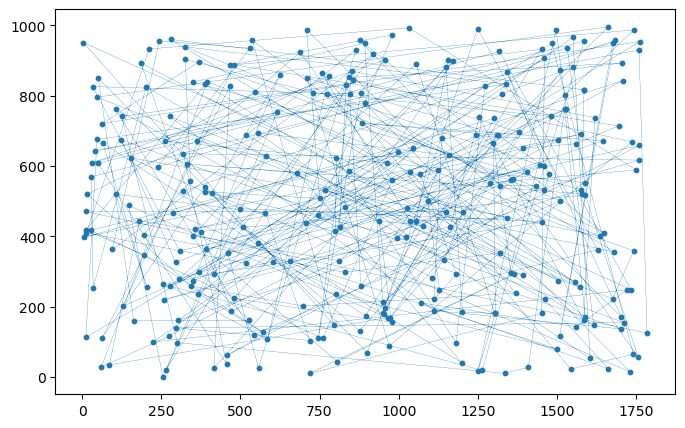

Weglänge = 18995.170332256224


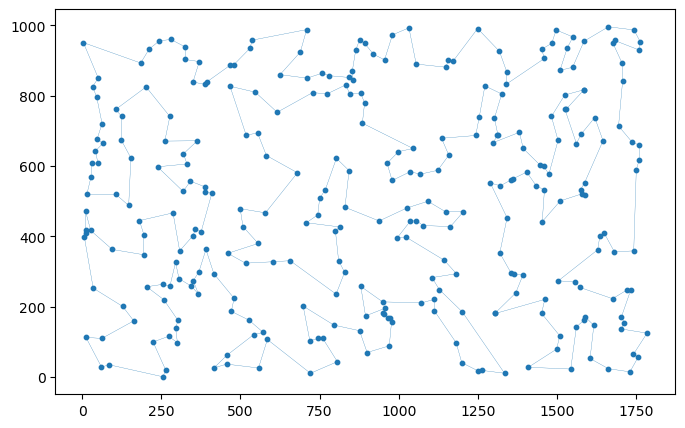

CPU times: total: 3min 6s
Wall time: 3min 6s


In [61]:
%%time
tour=[(1585, 817), (1578, 521), (331, 606), (680, 581), (1199, 41), (319, 528), (1682, 957), (1508, 118), (1676, 950), (28, 569), (35, 253), (202, 825), (1144, 332), (1204, 470), (11, 471), (1784, 125), (1759, 930), (42, 643), (616, 753), (264, 20), (842, 852), (1705, 893), (1509, 872), (1105, 283), (106, 761), (542, 121), (1510, 501), (325, 939), (1340, 833), (47, 676), (12, 113), (1325, 805), (1549, 881), (995, 396), (1392, 290), (768, 533), (1572, 255), (537, 958), (795, 148), (4, 951), (1733, 249), (1318, 926), (30, 609), (955, 902), (880, 807), (746, 110), (853, 869), (1619, 738), (1584, 161), (1254, 739), (1163, 428), (258, 220), (1759, 617), (320, 635), (456, 37), (50, 608), (1585, 955), (1354, 297), (1299, 667), (1305, 181), (1250, 18), (1497, 987), (1616, 147), (389, 832), (11, 417), (194, 348), (572, 127), (367, 237), (1272, 828), (1181, 98), (803, 622), (800, 415), (1645, 672), (885, 722), (1311, 688), (1458, 599), (358, 422), (1576, 691), (7, 398), (999, 641), (27, 417), (760, 110), (979, 559), (689, 924), (364, 672), (1342, 453), (1055, 445), (1156, 901), (1451, 932), (957, 196), (602, 328), (256, 264), (1264, 19), (1482, 741), (728, 809), (326, 903), (342, 557), (195, 405), (829, 298), (1319, 353), (277, 741), (1112, 189), (1702, 137), (708, 439), (1045, 650), (416, 26), (467, 827), (62, 110), (388, 541), (556, 380), (876, 132), (1289, 552), (1750, 589), (1032, 993), (212, 933), (13, 410), (516, 324), (1172, 899), (813, 427), (833, 831), (63, 721), (370, 897), (1460, 532), (1474, 577), (1341, 868), (1703, 171), (1135, 679), (1112, 221), (1182, 294), (1068, 577), (1762, 954), (125, 741), (301, 98), (1334, 11), (1409, 28), (1524, 763), (1588, 172), (1148, 470), (154, 623), (499, 479), (1453, 442), (416, 294), (508, 428), (920, 918), (95, 363), (244, 956), (530, 935), (238, 598), (1532, 936), (1587, 553), (261, 671), (547, 810), (963, 608), (1742, 359), (1675, 223), (46, 796), (1662, 996), (1036, 443), (758, 864), (1543, 23), (1741, 65), (1483, 949), (369, 300), (527, 162), (163, 160), (51, 850), (900, 70), (1123, 588), (351, 274), (625, 860), (410, 524), (1730, 15), (892, 779), (1681, 356), (1026, 481), (460, 352), (557, 26), (864, 930), (518, 688), (1461, 221), (1662, 24), (1071, 211), (1561, 143), (1721, 248), (224, 100), (830, 483), (1243, 687), (1503, 673), (273, 116), (61, 29), (395, 840), (1635, 401), (1092, 500), (1128, 249), (1628, 362), (1249, 991), (949, 181), (1313, 689), (710, 850), (970, 89), (1736, 669), (854, 845), (1381, 696), (972, 168), (1355, 561), (1404, 583), (471, 187), (185, 893), (1504, 274), (709, 988), (750, 508), (387, 527), (1023, 398), (1393, 650), (1561, 664), (1694, 714), (479, 888), (128, 201), (1529, 762), (295, 326), (123, 675), (1712, 155), (295, 140), (719, 104), (579, 467), (106, 520), (204, 257), (66, 665), (895, 174), (1077, 431), (938, 444), (977, 156), (480, 224), (1149, 881), (1201, 185), (1303, 181), (1055, 890), (306, 280), (1361, 564), (1756, 57), (1589, 518), (376, 414), (181, 445), (86, 35), (966, 169), (147, 488), (255, 1), (582, 630), (350, 402), (810, 331), (1524, 802), (1743, 987), (468, 887), (980, 973), (744, 461), (1036, 584), (1369, 239), (698, 202), (344, 259), (15, 520), (780, 857), (585, 107), (277, 258), (1460, 906), (1451, 181), (721, 11), (1364, 293), (806, 44), (391, 363), (1446, 603), (773, 805), (1649, 409), (876, 958), (1321, 544), (1434, 544), (949, 214), (287, 467), (1302, 736), (952, 179), (892, 949), (350, 839), (1574, 533), (303, 161), (1550, 967), (1604, 53), (554, 694), (1158, 631), (880, 258), (845, 805), (33, 826), (308, 359), (1760, 659), (457, 62), (802, 236), (1499, 80), (657, 331), (1707, 843), (843, 587), (1558, 270), (280, 960)]
print(f'Weglänge = {distance(tour)}')
show(tour)
tour = anneal(tour,alpha=0.998,H=150)
print(f'Weglänge = {distance(tour)}')
show(tour)

Weglänge = 18995.170332256224


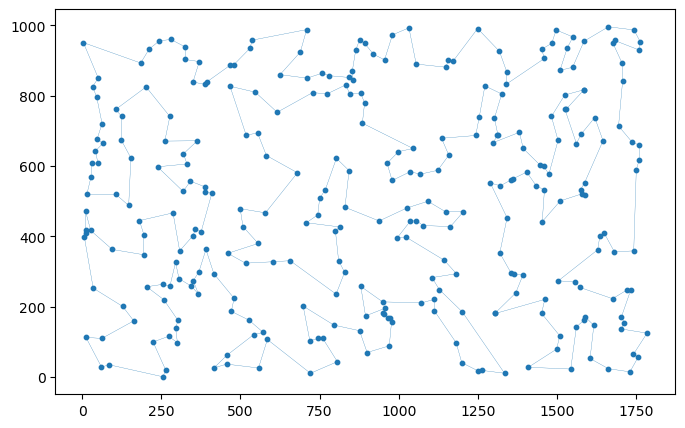

Weglänge = 19237.898033241887


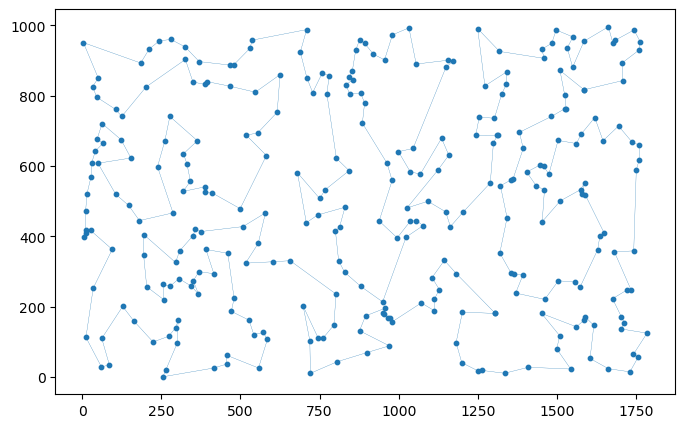

CPU times: total: 3min 5s
Wall time: 3min 5s


In [63]:
%%time
print(f'Weglänge = {distance(tour)}')
show(tour)
tour = anneal(tour,alpha=0.998,H=150)
print(f'Weglänge = {distance(tour)}')
show(tour)